In [70]:
import requests
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from textblob import TextBlob
from wordcloud import WordCloud

In [73]:
url = "https://twitter32.p.rapidapi.com/getSearch"

querystring = {"hashtag":"womenwhocode","start_date":"2017-01-01","end_date":"2021-06-10","lang":"en"}

headers = {
    'x-rapidapi-key': "ca27ec636emsh39078a13eadaf5dp1a213fjsna2440a39704b",
    'x-rapidapi-host': "twitter32.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
#print(response.content)
data1 = json.loads(response.text)
#print(data1)
data2 = data1['data']['tweets']
#print(data2)
mylist = []
for key,value in data2.items():
    mylist.append(value['full_text'])
print(mylist)

['Day 88 and 89: Amazing CSS Animation Resources😍\n\n#100DaysOfCode \n#WomenWhoCode https://t.co/tTYfG7Hrk7', '💻If you are interested in attending this event about the use of R in statistics and econometrics. It will be live using this link:\n\nhttps://t.co/zczHmkyLI3\n\n#Econometrics #EconTwitter #DataAnalysis #RStudio #WomenWhoCode #SER #RStats #Coding #100DaysOfCode https://t.co/tVTJ7uEfLF', 'Hit our Dm now \n#Springclasses \n#Fallclasses \n#Fallsemester \n#excel\n#Project\n#math\n#Essay  \n#WomenWhoCode\n#history \nPython\nOnline classes\n#physics\nPhilosophy \n#Chemistry\n#NodeJS\n#javascript  \nJavascript \nPaper pay  \n#100DaysOfCode\n#NodeJS\n#UK #USA #UAE #SAUDIARABIA #KUWAIT https://t.co/xdrmOeF40C', 'Taking\xa0small steps in the right direction counts than Big steps in the wrong direction.\nChange doesn’t happen overnight. It starts with the desire, then one small step in the right direction.\n\n#wednesdaythought #MachineLearning\xa0#100DaysOfCode\n#Python\xa0#womenintech\xa

In [74]:
df = pd.DataFrame(mylist, columns = ['tweets'])
df

,tweets
0,Day 88 and 89: Amazing CSS Animation Resources...
1,💻If you are interested in attending this event...
2,Hit our Dm now \n#Springclasses \n#Fallclasses...
3,Taking small steps in the right direction coun...
4,"True definition of coding for fun, I was tryi..."
5,Women in tech 👩🏽‍💻 I am voting for you! \n\nI ...
6,🤣 #SundayFunday #sundayvibes\n\nFixing a bug i...
7,[Day 33] #100DaysOfCode #CodeNewbie\n\nWorked ...
8,Day 41 #100DaysOfCode | day 3 of 50 projects i...
9,If you are into a business and do not own a we...


In [78]:
def CleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removes @mentions and substitutes with an empty string
    text = re.sub(r'#','', text) #removes #tags
    text = re.sub(r'RT[\s]+','',text) #removes the RT
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

df['tweets'] = df['tweets'].apply(CleanTxt)
df

,tweets
0,Day 88 and 89: Amazing CSS Animation Resources...
1,💻If you are interested in attending this event...
2,Hit our Dm now \nSpringclasses \nFallclasses \...
3,Taking small steps in the right direction coun...
4,"True definition of coding for fun, I was tryi..."
5,Women in tech 👩🏽‍💻 I am voting for you! \n\nI ...
6,🤣 SundayFunday sundayvibes\n\nFixing a bug in ...
7,[Day 33] 100DaysOfCode CodeNewbie\n\nWorked wh...
8,Day 41 100DaysOfCode | day 3 of 50 projects in...
9,If you are into a business and do not own a we...


In [80]:
#creating a function that shows subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating a function that shows the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df

,tweets,Subjectivity,Polarity
0,Day 88 and 89: Amazing CSS Animation Resources...,0.900000,0.600000
1,💻If you are interested in attending this event...,0.500000,0.193182
2,Hit our Dm now \nSpringclasses \nFallclasses \...,0.000000,0.000000
3,Taking small steps in the right direction coun...,0.478571,-0.071429
4,"True definition of coding for fun, I was tryi...",0.325000,0.216667
5,Women in tech 👩🏽‍💻 I am voting for you! \n\nI ...,0.400000,0.800000
6,🤣 SundayFunday sundayvibes\n\nFixing a bug in ...,0.000000,0.000000
7,[Day 33] 100DaysOfCode CodeNewbie\n\nWorked wh...,0.313889,-0.030556
8,Day 41 100DaysOfCode | day 3 of 50 projects in...,0.591667,0.283333
9,If you are into a business and do not own a we...,0.875000,0.050000


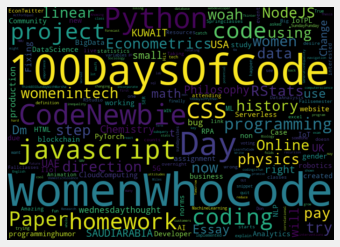

In [84]:
#creating a word cloud
all_words = ' '.join(twts for twts in df['tweets'])
wordcloud = WordCloud( width = 700, height = 500, random_state = 21, max_font_size = 120).generate(all_words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [85]:
#function that computes the negative/positive/neutral sentiments

def getScore(score):
    if score <0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else: 
        return 'positive'
df['Analysis'] = df['Polarity'].apply(getScore)
df

,tweets,Subjectivity,Polarity,Analysis
0,Day 88 and 89: Amazing CSS Animation Resources...,0.900000,0.600000,positive
1,💻If you are interested in attending this event...,0.500000,0.193182,positive
2,Hit our Dm now \nSpringclasses \nFallclasses \...,0.000000,0.000000,neutral
3,Taking small steps in the right direction coun...,0.478571,-0.071429,negative
4,"True definition of coding for fun, I was tryi...",0.325000,0.216667,positive
5,Women in tech 👩🏽‍💻 I am voting for you! \n\nI ...,0.400000,0.800000,positive
6,🤣 SundayFunday sundayvibes\n\nFixing a bug in ...,0.000000,0.000000,neutral
7,[Day 33] 100DaysOfCode CodeNewbie\n\nWorked wh...,0.313889,-0.030556,negative
8,Day 41 100DaysOfCode | day 3 of 50 projects in...,0.591667,0.283333,positive
9,If you are into a business and do not own a we...,0.875000,0.050000,positive


In [89]:
#sorts the tweets #printing positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'positive'):
        print(str(j) + ')' +sortedDF['tweets'][i])
        print()
        j+=1

1)Day 88 and 89: Amazing CSS Animation Resources😍

100DaysOfCode 
WomenWhoCode 

2)💻If you are interested in attending this event about the use of R in statistics and econometrics. It will be live using this link:



Econometrics EconTwitter DataAnalysis RStudio WomenWhoCode SER RStats Coding 100DaysOfCode 

3)True definition of coding for fun, I was  trying to explain to someone how to change CSS variables  using javascript  and when he asked how to use try ... catch ...finally, i implemented it in the same snippet 😂😂😂😂
CodeNewbie WomenWhoCode 100DaysOfCode 

4)Women in tech 👩🏽‍💻 I am voting for you! 

I want to see you WIN. Don’t quit. 

WomenWhoCode womenintech women 

5)Day 41 100DaysOfCode | day 3 of 50 projects in 50 days created cool rotating navigation. I may incorporate this in a future project :-) WomenWhoCode CodeNewbie

6)If you are into a business and do not own a website, you might be losing a lot of potential customers online. Knowing the importance of a website is key t

In [90]:
#sorts the tweets #printing negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'negative'):
        print(str(j) + ')' +sortedDF['tweets'][i])
        print()
        j+=1

1)Taking small steps in the right direction counts than Big steps in the wrong direction.
Change doesn’t happen overnight. It starts with the desire, then one small step in the right direction.

wednesdaythought MachineLearning 100DaysOfCode
Python womenintech WomenWhoCode 

2)[Day 33] 100DaysOfCode CodeNewbie

Worked whole day on the sql database lab homework, correlational subquery is as hard as the recursion in computerscience😱Tomorrow back to react.

coding programming LearnToCode data python WomenWhoCode javascript code codingisfun 

3)HMU now 
Write essays
Sociology
Thesis
English
Pay exam
assignment
Homework due
stats
Term paper
PHYSICS
Research paper
chemistry
project
history 
WomenWhoCode
Online class
Biology
100DaysOfCode
NodeJS
javascript 
code
Django
Dm us now 
UK USA UAE SAUDIARABIA KUWAIT 



In [91]:
#sorts the tweets #printing negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'neutral'):
        print(str(j) + ')' +sortedDF['tweets'][i])
        print()
        j+=1

1)Hit our Dm now 
Springclasses 
Fallclasses 
Fallsemester 
excel
Project
math
Essay  
WomenWhoCode
history 
Python
Online classes
physics
Philosophy 
Chemistry
NodeJS
javascript  
Javascript 
Paper pay  
100DaysOfCode
NodeJS
UK USA UAE SAUDIARABIA KUWAIT 

2)🤣 SundayFunday sundayvibes

Fixing a bug in production👨🏽‍💻
programminghumor

BigData Analytics DataScience AI ML IoT IIoT IoTPL PyTorch Python RStats CloudComputing Serverless 5G RPA NLP robotics blockchain programming 100DaysOfCode ThinkBIGSundayWithMarsha 

3)Community interventions have shown promise to reduce gender inequality and GBV. By changing attitudes and norms.

GenerationEquality gender DomesticViolence women men WomenWhoCode community wednesdaythought norms ActForEqual 

4)Day 46 👩🏻‍💻: Woah woah woah the forecast is working! 🤯 100DaysOfCode CodeNewbie WomenWhoCode 

5)When the documentation gives examples

ProgrammingMemes Programming ProgrammingLife Coding Code 100DaysOfCode Developer SoftwareDeveloper WomenWhoCode S

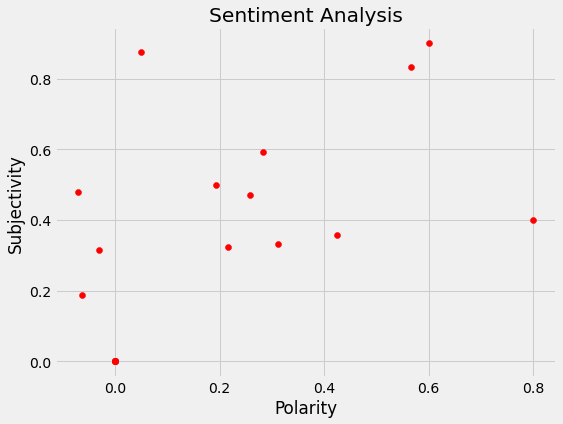

In [95]:
#plotting the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [101]:
#get the percentage of tweets
ptweets = df[df.Analysis =='positive']
ptweets = ptweets['tweets']
ptweets

0     Day 88 and 89: Amazing CSS Animation Resources...
1     💻If you are interested in attending this event...
4     True definition of coding for fun, I was  tryi...
5     Women in tech 👩🏽‍💻 I am voting for you! \n\nI ...
8     Day 41 100DaysOfCode | day 3 of 50 projects in...
9     If you are into a business and do not own a we...
10    day 29 of 100DaysOfCode \nCreated first GUI pr...
15    Try not to lose focus in anything you do... be...
17    You deserve the best grade and I'm always avai...
20    Day 19 100DaysOfCode learned a really new thin...
Name: tweets, dtype: object

In [106]:
round((ptweets.shape[0]/df.shape[0]*100),0)

48.0

In [107]:
#negative tweets
ntweets = df[df.Analysis =='negative']
ntweets = ntweets['tweets']
round((ntweets.shape[0]/df.shape[0]*100),0)

14.0

In [108]:
#neutral tweets
ntweets = df[df.Analysis =='neutral']
ntweets = ntweets['tweets']
round((ntweets.shape[0]/df.shape[0]*100),0)

38.0

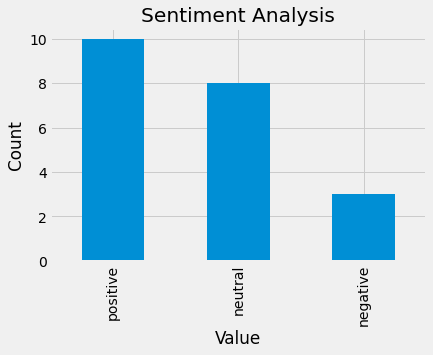

In [109]:
#simple graph
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()